<a href="https://colab.research.google.com/github/AndreyDyachkov/Data_analytics_with_Python/blob/main/02_yandex_real_estate_data_eda/2_Data_cleaning_and_EDA_(Exploratory_Data_Analysis_Yandex_Practicum_eng).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data cleaning and EDA of Saint Petersburg real estate data

<b>Task:</b> Perform EDA of data collected from Yandex.RealEstate (a real estate sales and rental service in Russia): an archive of advertisements for apartments in St. Petersburg and neighbouring settlements for a few years. Estimate real estate market value. Choose relevant features for an anti-fraud system.

<b>Data description:</b> There are 2 types of data: manually typed in and collected from a mapping platform. Columns:
- airports_nearest — the distance to the nearest airport (m)
- balcony — the number of balconies
- ceiling_height (m)
- cityCenters_nearest — the distance to the city centre (m)
- days_exposition — the number of days an advertisement was posted
- first_day_exposition — the publication date
- floor
- floors_total — how many storeys the building has
- is_apartment — an apartment or a flat (boolean)
- kitchen_area (m²)
- last_price
- living_area (m²)
- locality_name 
- open_plan (boolean)
- parks_around3000 — the number of parks within 3 km
- parks_nearest — the distance to the nearest park (m)
- ponds_around3000 — the number of ponds within 3 km
- ponds_nearest — the distance to the nearest pond (m)
- rooms — the number of rooms
- studio (boolean)
- total_area (m²)
- total_images — the number of photographs in the advertisement

### Stage 1. Getting data

Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Y_Praktikum/data/real_estate_data.csv',sep='\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Checking for duplicates, missing values, incorrect data types and getting basic descriptive statistics for the dataset.

In [4]:
df.shape

(23699, 22)

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [7]:
df.isnull().mean().sort_values(ascending=False)

is_apartment            0.882906
parks_nearest           0.659100
ponds_nearest           0.615596
balcony                 0.486054
ceiling_height          0.387991
airports_nearest        0.233850
cityCenters_nearest     0.232879
ponds_around3000        0.232837
parks_around3000        0.232837
days_exposition         0.134225
kitchen_area            0.096122
living_area             0.080299
floors_total            0.003629
locality_name           0.002068
total_images            0.000000
last_price              0.000000
studio                  0.000000
floor                   0.000000
rooms                   0.000000
first_day_exposition    0.000000
total_area              0.000000
open_plan               0.000000
dtype: float64

In [8]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [9]:
df[['first_day_exposition','is_apartment','locality_name','open_plan','studio']].describe()

,first_day_exposition,is_apartment,locality_name,open_plan,studio
count,23699,2775,23650,23699,23699
unique,1491,2,364,2,2
top,2018-02-01T00:00:00,False,Санкт-Петербург,False,False
freq,368,2725,15721,23632,23550


####Stage 1 results

There are 23699 entries in 22 columns. Some columns have missing values, moreover, in a few columns, more than half values are missing. Duplicates are not found.
Data types in some columns are not correct: float in floors_total, balcony; string in is_apartment, datetime.
Some columns have outliers or wrong entries (too high or too low values) 

<b>Data cleaning plan:</b>
- Detect missing values and fill them if possible
- Change data types
- Check for wrong values and outliers (in the next stage).

<b>By Columns:</b>

- airports_nearest — 23% of entries are missing.

- balcony — 49% of entries are missing. The data type can be converted from float to integer.

- ceiling_height — 39% of entries are missing.

- cityCenters_nearest — 23% of entries are missing.

- days_exposition — 13% of entries are missing.
 
- first_day_exposition — the string should be converted to datetime.

- floor — looks good

- floors_total — 0.4% of entries are missing.

- is_apartment — Only 2775 rows (12%) have values. The data type is string.

- kitchen_area — 10% of entries are missing. 

- last_price — there are outliers (too low values). 

- living_area — 8% of entries are missing. 

- locality_name — 0.2% of entries are missing. The column contains 364 unique values. More than half of the apartments are in St. Petersburg.

- open_plan — looks good

- parks_around3000 — 23% of entries are missing. The data type can be converted from float to integer.

- parks_nearest — Only 34% of entries have data. It is less than in the parks_around3000 column. 

- ponds_around3000 — 23% of entries are missing.The data type can be converted from float to integer.

- ponds_nearest —  Only 38% of entries have data. It is less than in ponds_around3000. 

- rooms — there are flats with 0 rooms

- studio, total_area, total_images — looks good

### Stage 2. Data cleaning

Checking for missing values

We will go from the lowest % of missing values to the highest.

##### Columns: rooms, studio
We will check those columns together as it is studios that could have 0 rooms.

In [10]:
df[df['rooms']==0]['rooms'].count()

197

In [11]:
df.groupby('studio')['rooms'].mean()

studio
False    2.083270
True     0.073826
Name: rooms, dtype: float64

The studios mostly have 0 rooms. However, there are some studios with non-zero rooms (the average number of rooms is above 0). Let's look at how many entries correspond to studios and how many studios we have.

In [12]:
df[df['rooms']==0]['studio'].value_counts()

True     138
False     59
Name: studio, dtype: int64

In [13]:
df[df['studio']==True]['studio'].count()

149

Not all entries with 0 rooms correspond to studios, and not all studios have 0 rooms. It could be a result of human mistakes due to manual input. Let's get description statistics for entries with 0 rooms.

In [14]:
df[df['rooms']==0].describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,197.000000,1.970000e+02,197.000000,197.0,82.000000,194.000000,183.000000,197.000000,0.0,126.000000,118.000000,118.000000,118.000000,29.000000,118.000000,69.000000,183.000000
mean,7.776650,3.337724e+06,29.279746,0.0,3.104268,16.896907,18.865246,8.578680,NaN,1.579365,24516.432203,13388.610169,0.296610,594.862069,0.822034,526.043478,109.180328
std,5.079055,5.046022e+06,25.855264,0.0,2.698948,6.925936,6.549527,6.290595,NaN,0.661552,12386.969865,5028.479861,0.559446,302.820164,0.873458,274.811509,158.847377
min,0.000000,9.457500e+05,15.500000,0.0,2.500000,3.000000,2.000000,1.000000,NaN,0.000000,6989.000000,1261.000000,0.000000,38.000000,0.000000,72.000000,3.000000
25%,4.000000,2.300000e+06,24.050000,0.0,2.700000,12.000000,16.000000,3.000000,NaN,1.000000,14567.000000,11618.000000,0.000000,396.000000,0.000000,348.000000,27.500000
50%,7.000000,2.700000e+06,26.050000,0.0,2.750000,17.000000,18.000000,7.000000,NaN,2.000000,21460.000000,13595.500000,0.000000,535.000000,1.000000,528.000000,50.000000
75%,11.000000,3.380000e+06,28.400000,0.0,2.800000,23.000000,19.950000,13.000000,NaN,2.000000,34004.750000,16383.750000,0.000000,761.000000,1.000000,674.000000,117.500000
max,21.000000,7.100000e+07,371.000000,0.0,27.000000,35.000000,68.000000,26.000000,NaN,2.000000,55551.000000,29846.000000,2.000000,1199.000000,3.000000,1159.000000,931.000000


In [15]:
df[(df['rooms']==0)&(df['balcony']>1)]['rooms'].count()

85

The maximum value equals 371 m, which is too large. However, other data look good: small living_area and no kitchen_area. The fact that most entries have two balconies (the median is 2) looks suspicious. Anyway, we will leave 0 values as it is considering them to be studios.

#####Column: first_day_exposition
We will convert the data type to datetime.

In [16]:
df['first_day_exposition']= pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [17]:
df['first_day_exposition'].describe(datetime_is_numeric=True)

count                            23699
mean     2017-11-08 21:55:18.975484160
min                2014-11-27 00:00:00
25%                2017-05-12 12:00:00
50%                2017-12-12 00:00:00
75%                2018-08-26 00:00:00
max                2019-05-03 00:00:00
Name: first_day_exposition, dtype: object

There are entries from November 2014 to May 2019

#####Column: locality_name
Let's look at the list of those settlements.

In [18]:
df['locality_name'].isnull().sum()

49

In [19]:
df['locality_name'].value_counts()

Санкт-Петербург                    15721
посёлок Мурино                       522
посёлок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: locality_name, Length: 364, dtype: int64

Apart from St. Petersburg, other localities have a small number of entries each. Missing values could be filled in with the mode (Санкт-Петербург - Saint Petersburg), but it could be misleading. So, we will fill up with нет_данных (no data) to make the further analysis easier.

In [20]:
df['locality_name'] = df['locality_name'].fillna("нет_данных")

#####Column: floors_total
We will fill missing values with median by locality, assuming that small settlements do not have multi-storey buildings. Then, we will probably get entries where a floor number is bigger than the number of storeys. In those cases, we will set the number of storeys equal to the floor number.

In [21]:
df['floors_total'].isnull().sum()

86

In [22]:
group_floors_total = df.groupby('locality_name')['floors_total'].median()
group_floors_total

locality_name
Бокситогорск            5.0
Волосово                5.0
Волхов                  5.0
Всеволожск              9.0
Выборг                  5.0
                       ... 
село Путилово           4.0
село Рождествено        3.0
село Русско-Высоцкое    5.0
село Старая Ладога      2.5
село Шум                2.0
Name: floors_total, Length: 365, dtype: float64

In [23]:
for i in group_floors_total.index:
    df.loc[(df['locality_name'] == i) & (df['floors_total'].isnull()), 'floors_total'] = group_floors_total[i]

df['floors_total'].isnull().sum()

0

Checking for entries where the number of storeys is less than the floor number.

In [24]:
df[df['floors_total']<df['floor']]['floors_total'].count()

32

We found 32 rows. So we will make floors_total equal to floor and check.

In [25]:
def set_storey(row):
    if row['floor'] > row['floors_total']:
        return row['floor']
    else:
        return row['floors_total']
        
df['floors_total'] = df.apply(set_storey,axis=1)     
        
df[df['floors_total']<df['floor']]['floors_total'].count()

0

We will convert the data type to integers

In [26]:
df['floors_total'] = df['floors_total'].astype('int')

#####Columns: living area, kitchen area
Missing values in those columns could be in the same rows, probably it is true for studios.

In [27]:
print(df['living_area'].isnull().sum())
print(df['kitchen_area'].isnull().sum())

1903
2278


In [28]:
df[(df['living_area'].isnull())&(df['kitchen_area'].isnull())][['total_area','living_area','kitchen_area','studio']].tail()

,total_area,living_area,kitchen_area,studio
23632,38.0,NaN,NaN,False
23642,80.3,NaN,NaN,False
23663,88.0,NaN,NaN,False
23670,45.6,NaN,NaN,False
23679,35.0,NaN,NaN,False


The assumption was disproved, missing values in living_area and kitchen_area occur not exactly in the same rows and not in studios only. We can assume a correlation between total_area, living_area, and kitchen_area and fill in missing values using linear regression or leave as it is. According to the task, we will leave missing values.

#####Column: days_exposition
The distribution is far from normal as the mean is much higher than the median. We will fill missing values with the median and check.

In [29]:
df['days_exposition'].isnull().sum()

3181

In [30]:
df['days_exposition'] = df['days_exposition'].fillna(df['days_exposition'].median())
df['days_exposition'].isnull().sum()

0

Changing the data type to integer.

In [31]:
df['days_exposition'] = df['days_exposition'].astype(int)

#####Columns: ponds around, parks around
We will check together, assuming that missing values are connected somehow.

In [32]:
print(df['ponds_around3000'].isnull().sum())
print(df['parks_around3000'].isnull().sum())

5518
5518


In [33]:
df[(df['ponds_around3000'].isnull())&(df['parks_around3000'].isnull())].count()

total_images            5518
last_price              5518
total_area              5518
first_day_exposition    5518
rooms                   5518
ceiling_height          2943
floors_total            5518
living_area             4895
floor                   5518
is_apartment             628
studio                  5518
open_plan               5518
kitchen_area            4803
balcony                 2808
locality_name           5518
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         5518
dtype: int64

The assumption is confirmed, missing values in both columns go together. We will check those values by locality, as it could be a sign of particular settlements.

In [34]:
group_parks_nearby = df[~df['parks_around3000'].isnull()].groupby('locality_name')['parks_around3000'].mean()
group_parks_nearby

locality_name
Зеленогорск                1.916667
Колпино                    0.522255
Красное Село               0.494318
Кронштадт                  1.789474
Ломоносов                  0.242424
Павловск                   1.552632
Петергоф                   1.338308
Пушкин                     0.747967
Санкт-Петербург            0.627586
Сестрорецк                 0.601093
нет_данных                 0.536585
поселок Лисий Нос          0.000000
поселок Мурино             0.000000
посёлок Александровская    0.000000
посёлок Белоостров         0.000000
посёлок Левашово           0.000000
посёлок Лисий Нос          0.000000
посёлок Металлострой       0.000000
посёлок Молодёжное         0.000000
посёлок Парголово          0.030581
посёлок Песочный           0.000000
посёлок Петро-Славянка     0.000000
посёлок Понтонный          0.000000
посёлок Репино             0.000000
посёлок Сапёрный           0.000000
посёлок Стрельна           0.704545
посёлок Усть-Ижора         0.000000
посёлок Шушары

Based on this table and Wikipedia we can conclude that parks are relevant only for the city of St. Petersburg and the settlements which are in fact parts of the city.

We will do the same for ponds.

In [35]:
group_ponds_nearby = df[~df['ponds_around3000'].isnull()].groupby('locality_name')['ponds_around3000'].mean()
group_ponds_nearby

locality_name
Зеленогорск                0.875000
Колпино                    0.997033
Красное Село               0.090909
Кронштадт                  1.936842
Ломоносов                  1.128788
Павловск                   1.842105
Петергоф                   1.308458
Пушкин                     0.872629
Санкт-Петербург            0.770434
Сестрорецк                 1.207650
нет_данных                 1.024390
поселок Лисий Нос          0.000000
поселок Мурино             2.000000
посёлок Александровская    1.000000
посёлок Белоостров         1.000000
посёлок Левашово           0.000000
посёлок Лисий Нос          0.000000
посёлок Металлострой       0.000000
посёлок Молодёжное         0.000000
посёлок Парголово          0.290520
посёлок Песочный           0.000000
посёлок Петро-Славянка     2.000000
посёлок Понтонный          0.350000
посёлок Репино             0.000000
посёлок Сапёрный           1.000000
посёлок Стрельна           1.045455
посёлок Усть-Ижора         0.000000
посёлок Шушары

We obtained the same result. Ponds are shown only for the city of St. Petersburg and the settlements which are parts of the city, while other 300+ localities do not have ponds. So we will leave missing values in those columns.

#####Columns: cityCenters_nearest, airports_nearest
We will check those columns together, as the percentage of missing values is the same (23%), which means that there could be a relationship between those values. <br/> We will group missing values by locality_name. The assumption is that the city centre and airports are relevant for St. Petersburg only.

In [36]:
print(df['cityCenters_nearest'].isnull().sum())
print(df['airports_nearest'].isnull().sum())

5519
5542


In [37]:
group_city_centre = df[~df['cityCenters_nearest'].isnull()].groupby('locality_name')['cityCenters_nearest'].mean()
group_city_centre

locality_name
Зеленогорск                54617.583333
Колпино                    32113.771513
Красное Село               30020.284091
Кронштадт                  49195.726316
Ломоносов                  50739.969697
Павловск                   33206.921053
Петергоф                   35468.925373
Пушкин                     28745.375000
Санкт-Петербург            11601.291571
Сестрорецк                 34624.480874
нет_данных                 11278.902439
поселок Лисий Нос          28246.000000
поселок Мурино             21888.000000
посёлок Александровская    27468.000000
посёлок Белоостров         38868.000000
посёлок Левашово           25727.000000
посёлок Лисий Нос          27297.000000
посёлок Металлострой       27561.348485
посёлок Молодёжное         65529.200000
посёлок Парголово          19924.776758
посёлок Песочный           26475.250000
посёлок Петро-Славянка     27165.000000
посёлок Понтонный          32293.450000
посёлок Репино             43392.250000
посёлок Сапёрный          

The city centre is shown for St. Petersburg and its parts.

We will use the same approach for the airports.

In [38]:
group_airports_nearest = df[~df['airports_nearest'].isnull()].groupby('locality_name')['airports_nearest'].median()
group_airports_nearest

locality_name
Зеленогорск                72282.0
Колпино                    26232.0
Красное Село               25715.5
Кронштадт                  67850.0
Ломоносов                  48415.5
Павловск                   20529.5
Петергоф                   39231.0
Пушкин                     15766.0
Санкт-Петербург            26757.5
Сестрорецк                 56692.0
нет_данных                 22041.0
поселок Лисий Нос          55930.0
поселок Мурино             51553.0
посёлок Александровская    12896.5
посёлок Белоостров         57769.0
посёлок Левашово           52693.0
посёлок Лисий Нос          54988.5
посёлок Металлострой       25758.0
посёлок Молодёжное         84665.0
посёлок Парголово          53426.0
посёлок Песочный           54831.5
посёлок Петро-Славянка     20605.0
посёлок Понтонный          30642.0
посёлок Репино             61797.5
посёлок Сапёрный           34147.5
посёлок Стрельна           28317.0
посёлок Усть-Ижора         26510.5
посёлок Шушары             17427.0
посёло

The result is the same. Only St. Petersburg have this feature. We will leave missing values as it is.

In [39]:
df['airports_nearest'].isnull().sum()

5542

#####Column: ceiling_height
The range shouldn't be too big. In fact, the feature has unreal minimum and maximum values. We will leave those values and missing values as it is.

In [40]:
df['ceiling_height'].isnull().sum()

9195

##### Column: balcony
We will fill in missing values with 0 assuming that missing values mean no balcony flats. Also, we will change the data type to integer.

In [41]:
df['balcony'].isnull().sum()

11519

In [42]:
df['balcony'] = df['balcony'].fillna(0)
df['balcony'].isnull().sum()

0

In [43]:
df['balcony'] = df['balcony'].astype('int')

##### Columns: ponds_nearest, parks_nearest
Less than half of the rows (38%) are filled. We will leave missing data as it is.

##### Column: is_apartment
We assume that missing values are equal to False, as the share of apartments is low. We will also change the data type to boolean.

In [44]:
df['is_apartment'] = df['is_apartment'].fillna(False)

In [45]:
df['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

In [46]:
df['is_apartment'].dtypes

dtype('bool')

<b>The dataset we have after filling missing values and changing data types:</b>

In [47]:
report = df.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / df.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
parks_nearest,15620,0.66
ponds_nearest,14589,0.62
ceiling_height,9195,0.39
airports_nearest,5542,0.23
cityCenters_nearest,5519,0.23
ponds_around3000,5518,0.23
parks_around3000,5518,0.23
kitchen_area,2278,0.10
living_area,1903,0.08
total_images,0,0.00


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

####Data cleaning results: 
We filled missing values where it was possible and changed the data types where they were wrong. 
By columns:

- airports_nearest & cityCenters_nearest — We found that the data were filled only for St. Petersburg. However, there were missing values for St. Petersburg as well. We left all the missing values.

- balcony — We assumed that missing values mean no balcony flats and filled with 0. We also converted the data type to integers.

- ceiling_height — We left missing data as it is.

- days_exposition — We filled in the missing data with the median and changed the data type to integers.
 
- first_day_exposition — We changed the data type to datetime.

- floors_total — We changed missing values with the median by locality, as we were not expecting multi-storey buildings there. We also fixed the data type here.

- is_apartment — We changed missing values to False and fixed the data type to boolean.

- kitchen_area & living_area — We left all the missing values as there is no data we can use to fill in.   

- locality_name — We left all the missing values as there is no data we can use to fill in those names.

- parks_around3000 & ponds_around3000 — We found that the data are for St. Petersburg only. However, there are missing values in St. Petersburg as well.

- parks_nearest & ponds_nearest — We left missing data as it is.

- rooms — We left 0 values assuming studios.


### Stage 3. Adding calculated columns

According to the task, we will add a couple of additional columns.

##### Adding price per square meter

In [49]:
df['price_per_square_metre'] = df['last_price'] / df['total_area']

##### Adding publication day of the week, month and year

In [50]:
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

##### Adding month names and names of the days

In [51]:
df['weekday_name'] = df['first_day_exposition'].dt.day_name()
df['month_name'] = df['first_day_exposition'].dt.month_name()

##### Categories for the floors: the first floor, the top one and other

In [52]:
def floor_cat(row):
    if row['floor'] == row['floors_total']:
        return 'top floor'
    elif row['floor'] == 1:
        return 'first floor'
    else:
        return 'other'

df['floor_cat'] = df.apply(floor_cat, axis=1)

##### Adding living to total area and kitchen to total area ratios

In [53]:
df['living_to_total_area'] = df['living_area'] / df['total_area']
df['kitchen_to_total_area'] = df['kitchen_area'] / df['total_area']

Let's check

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23699 non-null  int64         
 1   last_price              23699 non-null  float64       
 2   total_area              23699 non-null  float64       
 3   first_day_exposition    23699 non-null  datetime64[ns]
 4   rooms                   23699 non-null  int64         
 5   ceiling_height          14504 non-null  float64       
 6   floors_total            23699 non-null  int64         
 7   living_area             21796 non-null  float64       
 8   floor                   23699 non-null  int64         
 9   is_apartment            23699 non-null  bool          
 10  studio                  23699 non-null  bool          
 11  open_plan               23699 non-null  bool          
 12  kitchen_area            21421 non-null  float6

### Stage 4. EDA

####  Area, price, number of rooms, ceiling height. Descriptive statistics and histograms.

##### Descriptive statistics

In [55]:
df[['total_area','last_price','rooms','ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23699.000000,2.369900e+04,23699.000000,14504.000000
mean,60.348651,6.541549e+06,2.070636,2.771499
std,35.654083,1.088701e+07,1.078405,1.261056
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.520000
50%,52.000000,4.650000e+06,2.000000,2.650000
75%,69.900000,6.800000e+06,3.000000,2.800000
max,900.000000,7.630000e+08,19.000000,100.000000


##### Histograms and boxplots

<b>Area:</b>

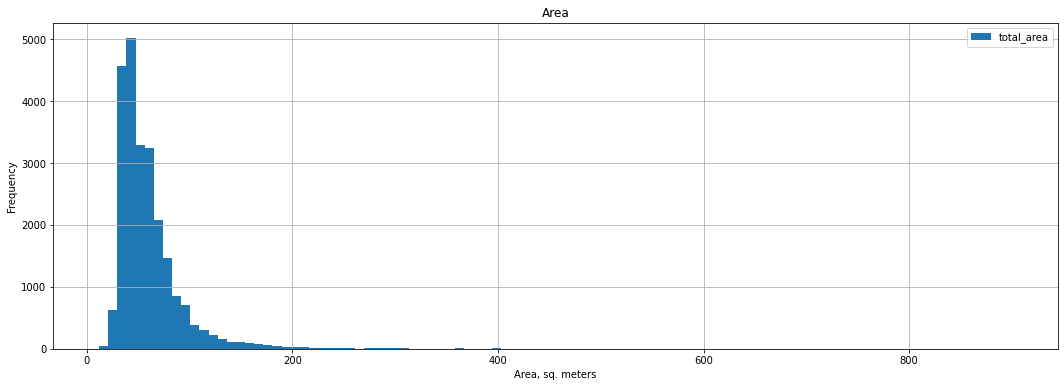

In [56]:
df.plot(kind='hist', y='total_area', bins=100, grid=True, figsize=(18,6), title='Area')
plt.xlabel('Area, sq. meters')
plt.ylabel('Frequency')
plt.show()

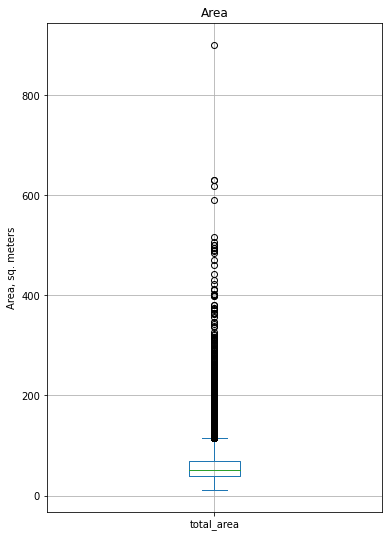

In [57]:
df.plot(kind='box', y='total_area', grid=True, figsize=(6,9), title='Area')
plt.ylabel('Area, sq. meters')
plt.show()

Total_area: 60 +/- 36 metres, min 12, max 900, a right-skewed distribution. Values above 400m are outliers.

<b>Price:</b>

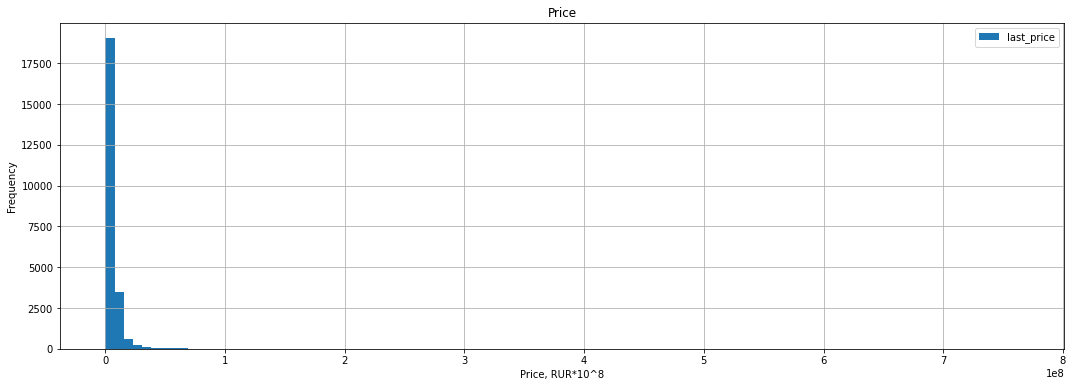

In [58]:
df.plot(kind='hist', y='last_price', bins=100, grid=True, figsize=(18,6), title='Price')
plt.xlabel('Price, RUR*10^8')
plt.ylabel('Frequency')
plt.show()

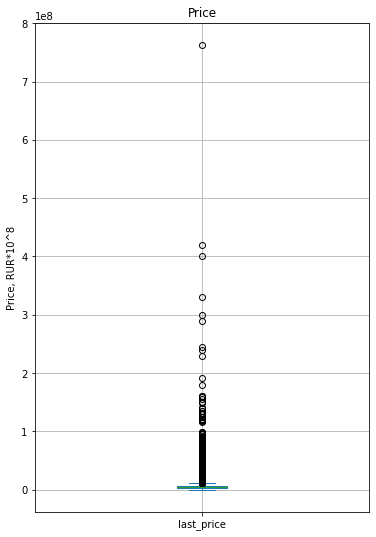

In [59]:
df.plot(kind='box', y='last_price', grid=True, figsize=(6,9), title='Price')
plt.ylabel('Price, RUR*10^8')
plt.show()

Last_price: the range is quite large: 6.5M +/- 11M, min 12K, max 763M. A right-skewed distribution, as the mean (6.5M) is significantly larger than the median (4.7M). Minimum values are possibly misprints, as they are too low.

<b>Number of rooms:</b>

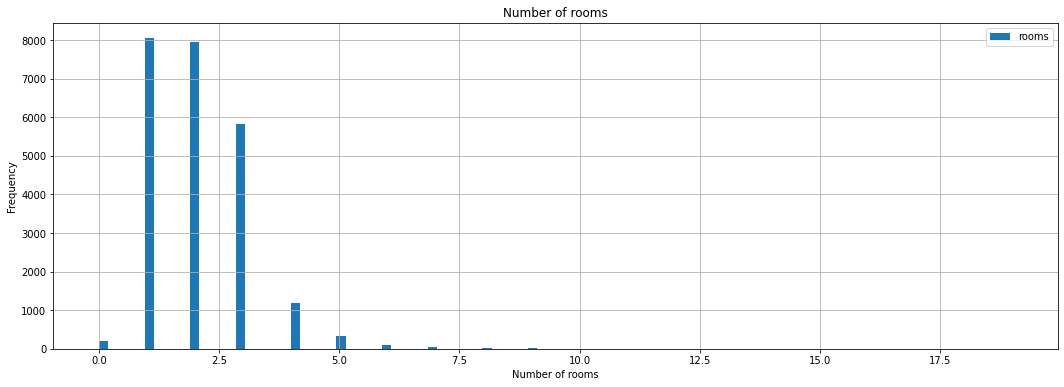

In [60]:
df.plot(kind='hist', y='rooms', bins=100, grid=True, figsize=(18,6), title='Number of rooms')
plt.xlabel('Number of rooms')
plt.ylabel('Frequency')
plt.show()

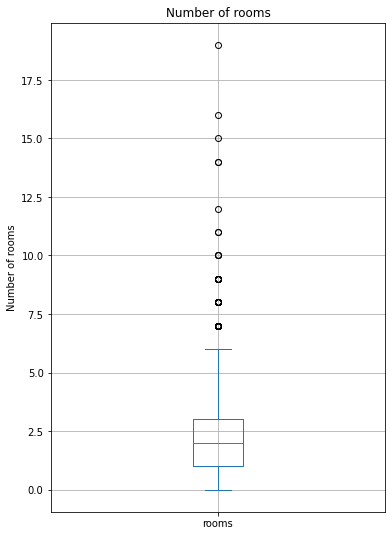

In [61]:
df.plot(kind='box', y='rooms', grid=True, figsize=(6,9), title='Number of rooms')
plt.ylabel('Number of rooms')
plt.show()

Rooms: 2 +/- 1, min 0, max 19. Flats with 0 rooms are studios.

<b>Ceiling height:</b>

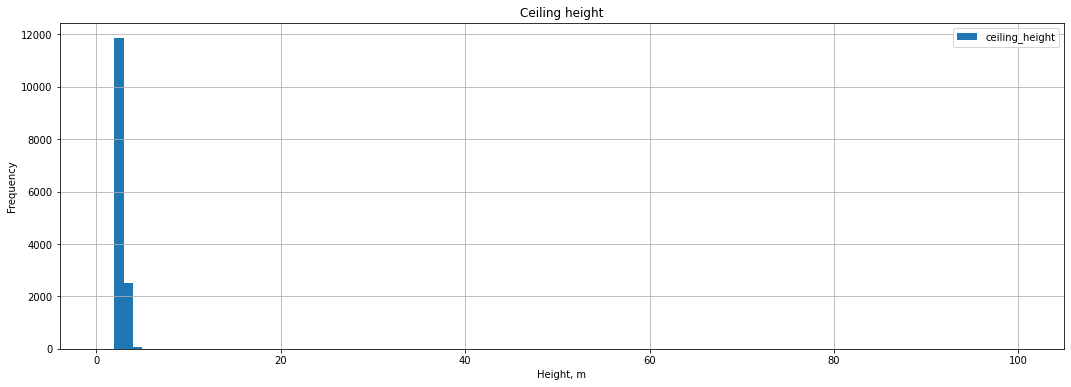

In [62]:
df.plot(kind='hist', y='ceiling_height', bins=100, grid=True, figsize=(18,6), title='Ceiling height')
plt.xlabel('Height, m')
plt.ylabel('Frequency')
plt.show()

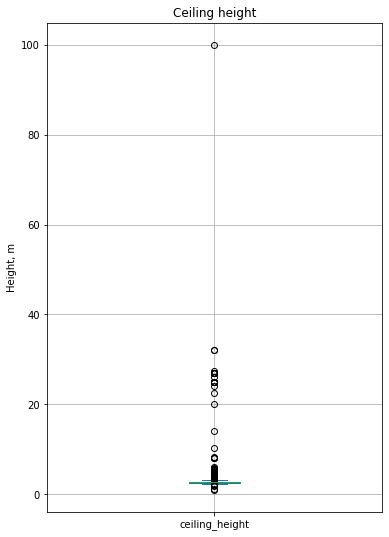

In [63]:
df.plot(kind='box', y='ceiling_height', grid=True, figsize=(6,9), title='Ceiling height')
plt.ylabel('Height, m')
plt.show()

Ceiling height: 2.8m +/- 1.3m. Minimum and maximum values are far from real.

#### Days exposition

##### Descriptive statistics

In [64]:
df['days_exposition'].describe()

count    23699.000000
mean       169.360226
std        206.535633
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

##### Histogram and boxplot

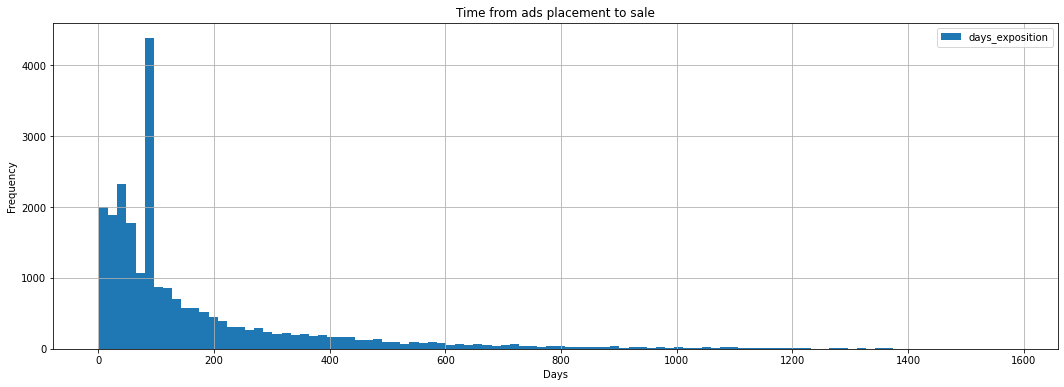

In [65]:
df.plot(kind='hist', y='days_exposition', bins=100, grid=True, figsize=(18,6), title='Time from ads placement to sale')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

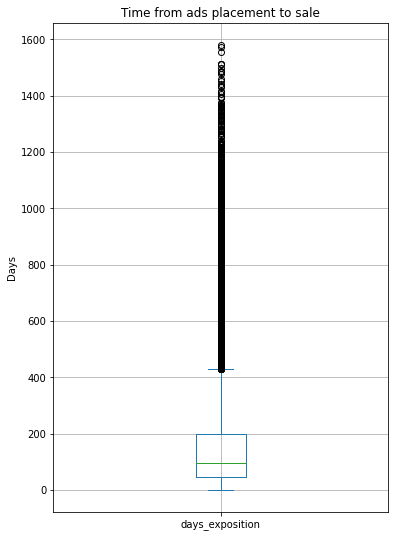

In [66]:
df.plot(kind='box', y='days_exposition', grid=True, figsize=(6,9), title='Time from ads placement to sale')
plt.ylabel('Days')
plt.show()

In [67]:
df['days_exposition'].value_counts()

95      3245
45       880
60       538
7        234
30       208
        ... 
1021       1
1362       1
1105       1
795        1
971        1
Name: days_exposition, Length: 1141, dtype: int64

Days_exposition: the range is quite large: 169 +/- 207 days; median 95, a right-skewed distribution. The peak on the histogram is partly due to filling the gaps with the median. As we can see,  it usually takes 95 days to sell an apartment.

#### Day, month and year of publication

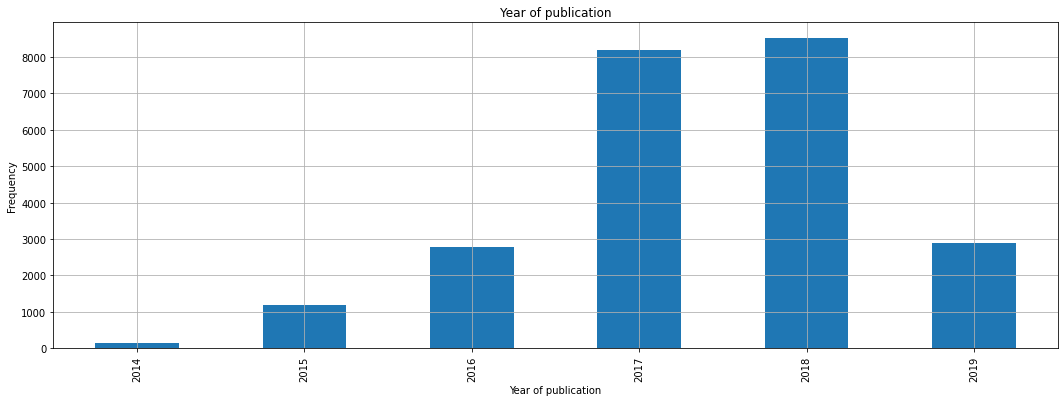

In [68]:
df.groupby('year')['year'].count().plot(kind = 'bar',grid=True, figsize=(18,6), title='Year of publication')
plt.xlabel('Year of publication')
plt.ylabel('Frequency')
plt.show()

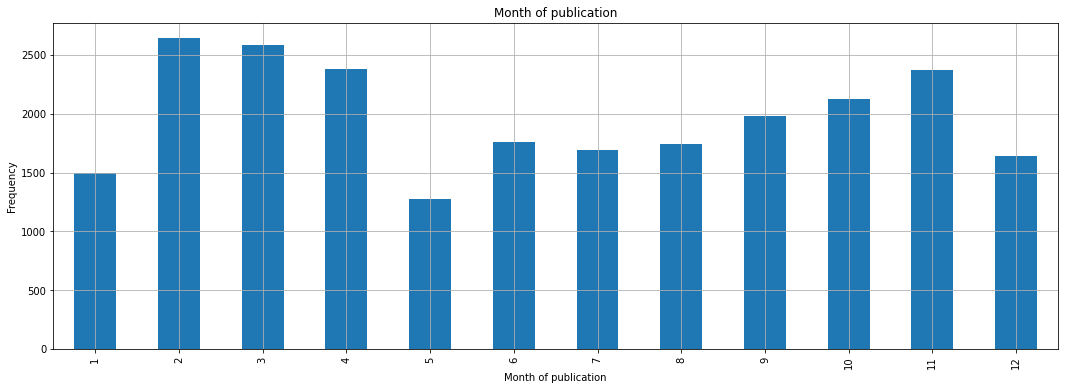

In [69]:
df.groupby('month')['month_name'].count().plot(kind = 'bar',grid=True, figsize=(18,6), title='Month of publication')
plt.xlabel('Month of publication')
plt.ylabel('Frequency')
plt.show()

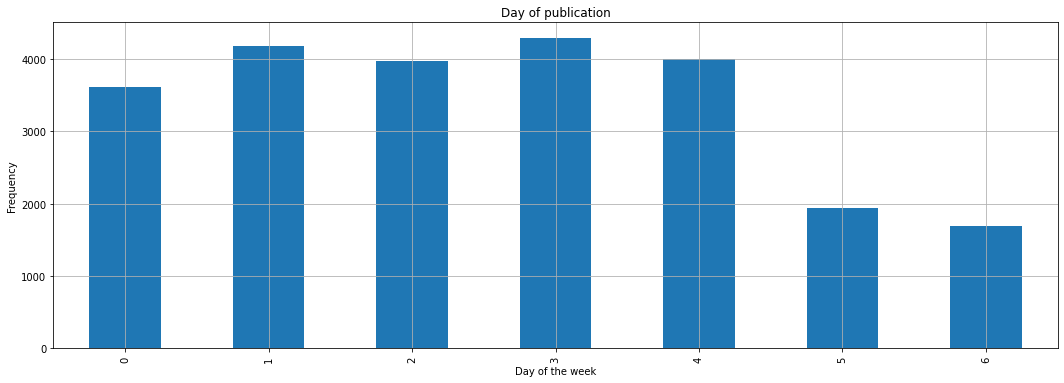

In [70]:
df.groupby('weekday')['weekday'].count().plot(kind = 'bar',grid=True, figsize=(18,6), title='Day of publication')
plt.xlabel('Day of the week')
plt.ylabel('Frequency')
plt.show()

The distribution of publications: 
- Years: the number of ads grew steadily from 2015 to 2018 (data for 2014 and 2019 are incomplete).
- Months: there were two peaks in February-March and November.
- Days of the week: advertisements are rarely posted on Friday-Saturday.

#### Removing outliers

##### total_area

The distribution is not normal, so we will use 1.5*IQR.

In [71]:
Q1,Q3 = df['total_area'].quantile(0.25), df['total_area'].quantile(0.75)
IQR = Q3 - Q1
cut_off = IQR * 1.5
lower, upper = Q1 - cut_off, Q3 + cut_off
print("Lower cut off:", lower,"Upper cut off:", upper)

Lower cut off: -4.8500000000000085 Upper cut off: 114.75000000000001


In [72]:
fixed_df = df[(df['total_area'] > lower) & (df['total_area'] < upper)]

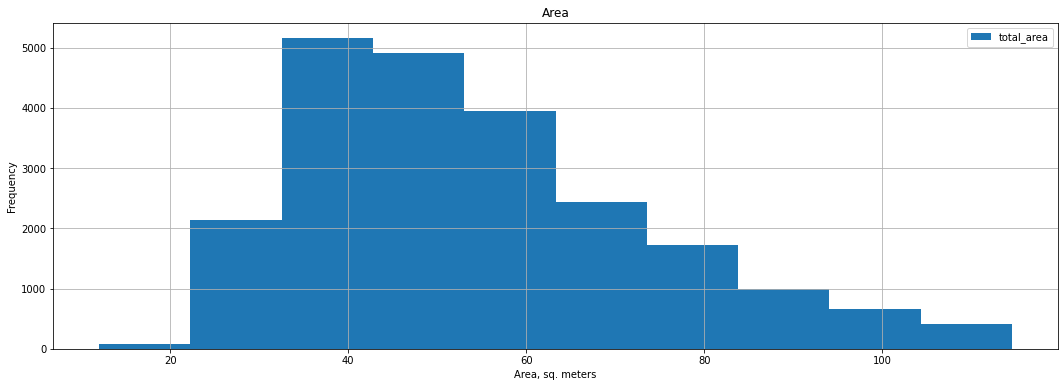

In [73]:
fixed_df.plot(kind='hist', y='total_area', bins=10, grid=True, figsize=(18,6), title='Area')
plt.xlabel('Area, sq. meters')
plt.ylabel('Frequency')
plt.show()

We cut off all apartments with an area larger than 114 meters. The sample became more homogeneous in terms of the area, but now it is more difficult to predict prices for large apartments.

##### last_price

The distrbution is not normal. We will use 1.5*IQR to remove outliers.

In [74]:
Q1,Q3 = df['last_price'].quantile(0.25), df['last_price'].quantile(0.75)
cut_off = (Q3 - Q1) * 1.5
lower, upper = Q1 - cut_off, Q3 + cut_off
print("Lower cut off:", lower,"Upper cut off:", upper)

Lower cut off: -1700000.0 Upper cut off: 11900000.0


In [75]:
fixed_df = fixed_df[(fixed_df['last_price'] > lower) & (fixed_df['last_price'] < upper)]

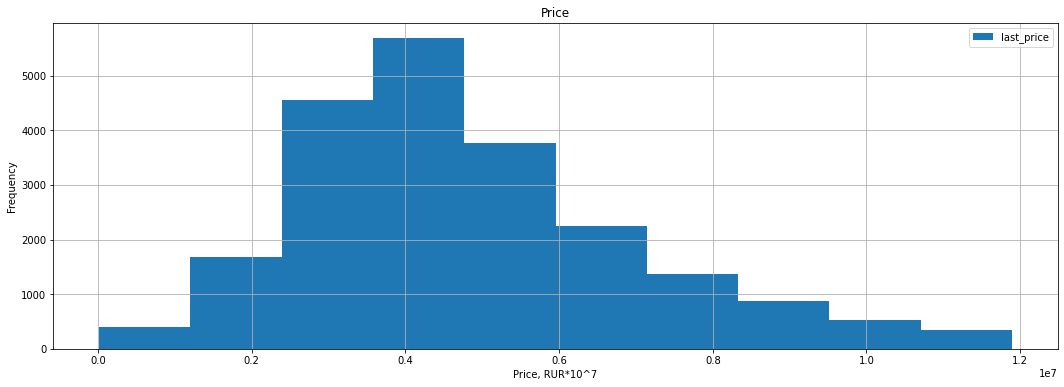

In [76]:
fixed_df.plot(kind='hist', y='last_price', bins=10, grid=True, figsize=(18,6), title='Price')
plt.xlabel('Price, RUR*10^7')
plt.ylabel('Frequency')
plt.show()

We cut off all the apartments with a price over 11.9M. The sample is more homogeneous now. However, the lowest value (12K) needs to be removed manually.

In [77]:
fixed_df = fixed_df.query('last_price > last_price.min()')

##### rooms

As we cut off the sample by prices and areas, the number of rooms should be without outliers. Let's check.

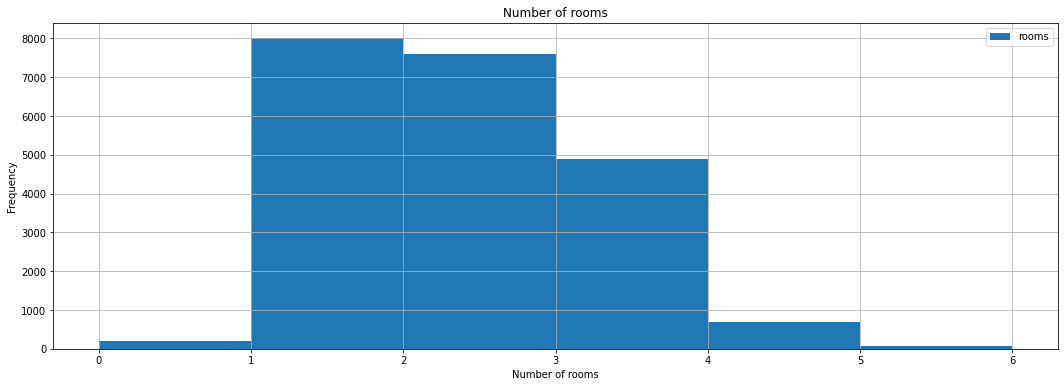

In [78]:
fixed_df.plot(kind='hist', y='rooms', bins=6, grid=True, figsize=(18,6), title='Number of rooms')
plt.xlabel('Number of rooms')
plt.ylabel('Frequency')
plt.show()

Confirmed, the entries with large number of rooms were removed earlier.

##### ceiling_height

As we didn't fill in the gaps in the ceiling_height, 38% of the values are empty. The column shouldn't be used for further analysis.

In [79]:
Q1,Q3 = df['ceiling_height'].quantile(0.25), df['ceiling_height'].quantile(0.75)
cut_off = (Q3 - Q1) * 1.5
lower, upper = Q1 - cut_off, Q3 + cut_off
print("Lower cut off:", lower,"Upper cut off:", upper)

Lower cut off: 2.1000000000000005 Upper cut off: 3.2199999999999998


In [80]:
fixed_df = fixed_df[(fixed_df['ceiling_height'] > lower) & (fixed_df['ceiling_height'] < upper)]

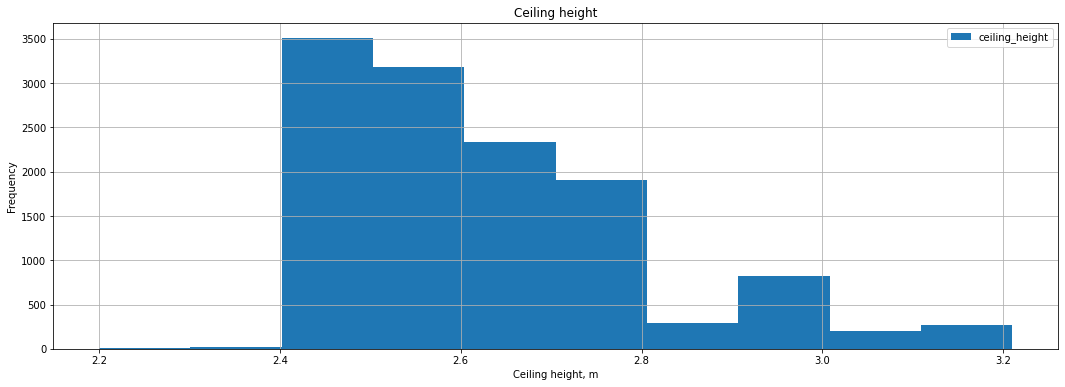

In [81]:
fixed_df.plot(kind='hist', y='ceiling_height', bins=10, grid=True, figsize=(18,6), title='Ceiling height')
plt.xlabel('Ceiling height, m')
plt.ylabel('Frequency')
plt.show()

We got entries in the range 2.1 - 3.2 metres. It looks relevant for a standard apartment, but non-standard flats are out of our scope.

#### Comparing the final data frame with the original one.

In [82]:
len(fixed_df) /len(df) -1

-0.4708215536520528

As a result of data cleaning we decreased the dataset by 47%

#### Question 1. Which of those factors affect prices? Does the price depend on the area, number of rooms, distance from the city centre?

In [83]:
fixed_df[['last_price', 'total_area', 'rooms','cityCenters_nearest','ceiling_height']].corr()

,last_price,total_area,rooms,cityCenters_nearest,ceiling_height
last_price,1.000000,0.689256,0.427539,-0.318447,0.433957
total_area,0.689256,1.000000,0.804765,-0.097715,0.300585
rooms,0.427539,0.804765,1.000000,-0.051545,0.042359
cityCenters_nearest,-0.318447,-0.097715,-0.051545,1.000000,-0.254328
ceiling_height,0.433957,0.300585,0.042359,-0.254328,1.000000


There is a moderate correlation (0.69) between areas and prices. Other relationships are weak.

<b>Relationship between prices and areas</b>

Let's draw a scatter plot

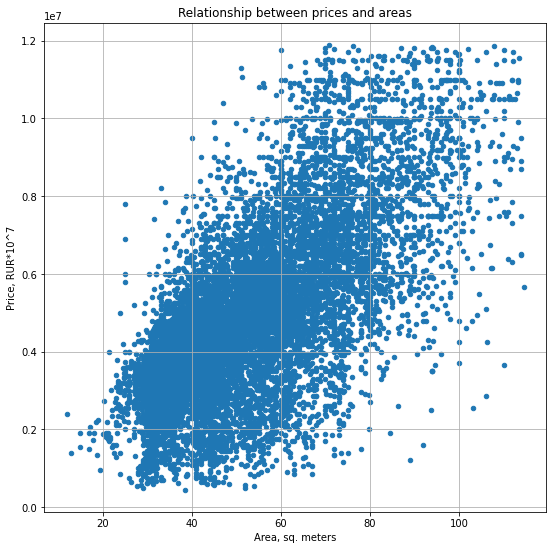

In [84]:
fixed_df.plot(kind='scatter', x='total_area', y='last_price', grid=True, figsize=(9,9), title='Relationship between prices and areas')
plt.xlabel('Area, sq. meters')
plt.ylabel('Price, RUR*10^7')
plt.show()

As we can see on the scatter plot, the larger the area, the higher the price. The correlation coefficient is 0.69.

<b> Relationship between the price and the number of rooms</b>

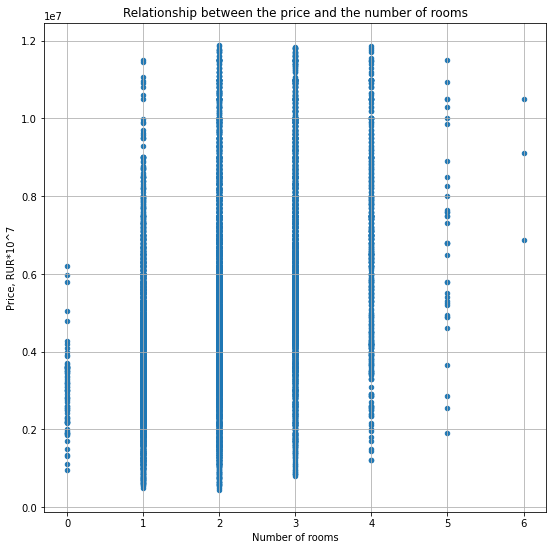

In [85]:
fixed_df.plot(kind='scatter', x='rooms', y='last_price', grid=True, figsize=(9,9), title='Relationship between the price and the number of rooms')
plt.xlabel('Number of rooms')
plt.ylabel('Price, RUR*10^7')
plt.show()

The correlation is weak, and the plot doesn't show the relationship clearly. Let's look at the average price by the number of rooms.

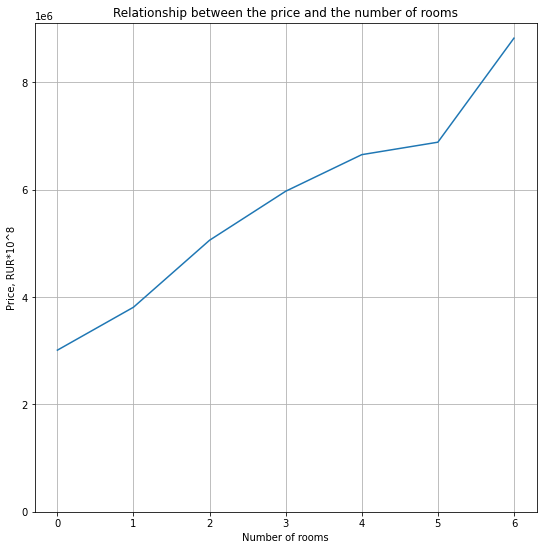

In [86]:
fixed_df.groupby('rooms')['last_price'].mean().plot(x='rooms', y='last_price', grid=True, figsize=(9,9), ylim=0 ,title='Relationship between the price and the number of rooms')
plt.xlabel('Number of rooms')
plt.ylabel('Price, RUR*10^8')
plt.show()

As we can see, the more rooms apartment has, the higher price. There should be a relationship between those variables.

<b>Relationship between the price and the distance to the city centre</b>

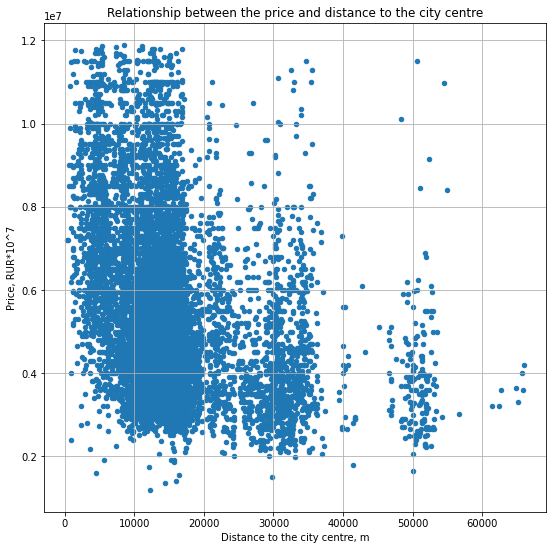

In [87]:
fixed_df.plot(kind='scatter', x='cityCenters_nearest', y='last_price', grid=True, figsize=(9,9), title='Relationship between the price and distance to the city centre')
plt.xlabel('Distance to the city centre, m')
plt.ylabel('Price, RUR*10^7')
plt.show()

The correlation is weak and can't be seen on the scatter plot. Let's group by distance and look at the average price per group.

In [88]:
fixed_df['cityCenters_nearest_group'] = pd.qcut(fixed_df['cityCenters_nearest'],5)
fixed_df['cityCenters_nearest_group'].value_counts()

<ipython-input-88-f05803313f4b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed_df['cityCenters_nearest_group'] = pd.qcut(fixed_df['cityCenters_nearest'],5)


(12602.8, 14794.0]    1935
(328.999, 9992.8]     1934
(17438.6, 65968.0]    1934
(9992.8, 12602.8]     1933
(14794.0, 17438.6]    1932
Name: cityCenters_nearest_group, dtype: int64

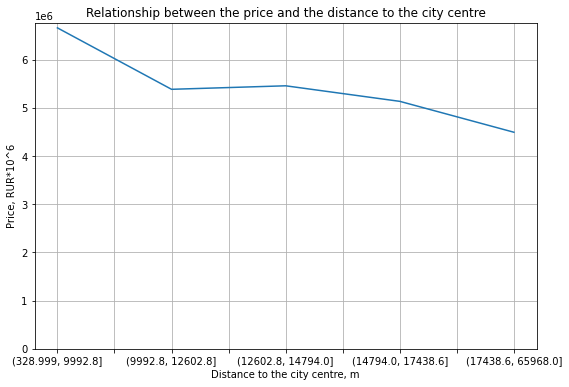

In [89]:
fixed_df.groupby('cityCenters_nearest_group')['last_price'].mean().plot(x='cityCenters_nearest_group', y='last_price', grid=True, figsize=(9,6),ylim=0, title='Relationship between the price and the distance to the city centre')
plt.xlabel('Distance to the city centre, m')
plt.ylabel('Price, RUR*10^6')
plt.show()

It can be seen that the price goes down as the distance increases. It seems to be a relationship between those variables.

<b>Relationship between the price and the floor number</b>

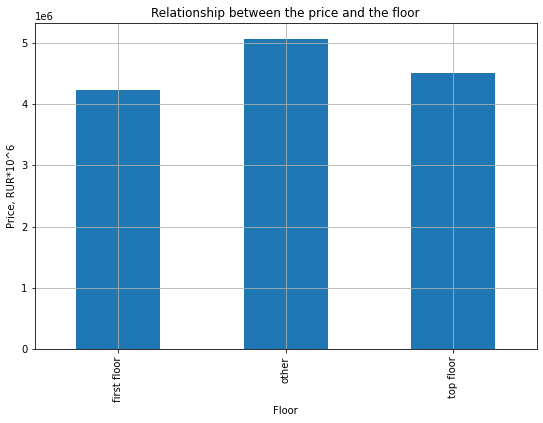

In [90]:
fixed_df.groupby('floor_cat')['last_price'].mean().plot(kind='bar', x='floor_cat', y='last_price', grid=True, figsize=(9,6),ylim=0, title='Relationship between the price and the floor')
plt.xlabel('Floor')
plt.ylabel('Price, RUR*10^6')
plt.show()

It can be seen that the first floor is on average the cheapest, the top floor is slightly more expensive, while other floors are the most expensive ones.

<b>Relationship between the price and the post date (day of the week, month, year)</b>

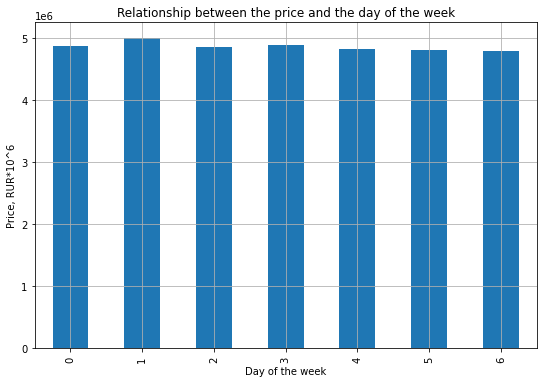

In [91]:
fixed_df.groupby('weekday')['last_price'].mean().plot(kind='bar', x='weekday', y='last_price', grid=True, figsize=(9,6), title='Relationship between the price and the day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Price, RUR*10^6')
plt.show()

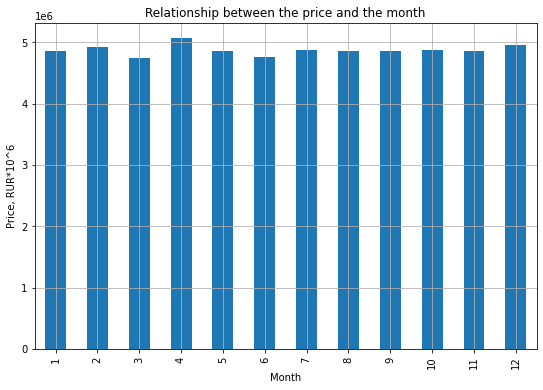

In [92]:
fixed_df.groupby('month')['last_price'].mean().plot(kind='bar', x='month', y='last_price', grid=True, figsize=(9,6), title='Relationship between the price and the month')
plt.xlabel('Month')
plt.ylabel('Price, RUR*10^6')
plt.show()

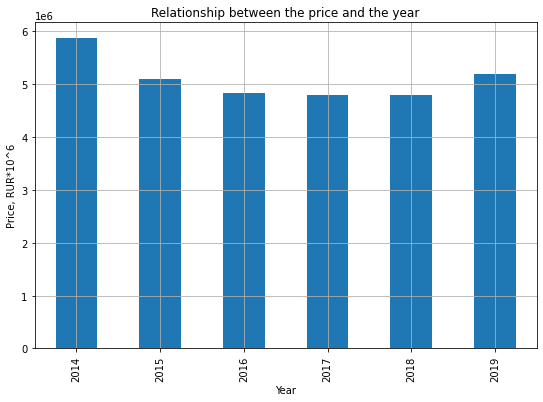

In [93]:
fixed_df.groupby('year')['last_price'].mean().plot(kind='bar', x='year', y='last_price', grid=True, figsize=(9,6),ylim=0, title='Relationship between the price and the year')
plt.xlabel('Year')
plt.ylabel('Price, RUR*10^6')
plt.show()

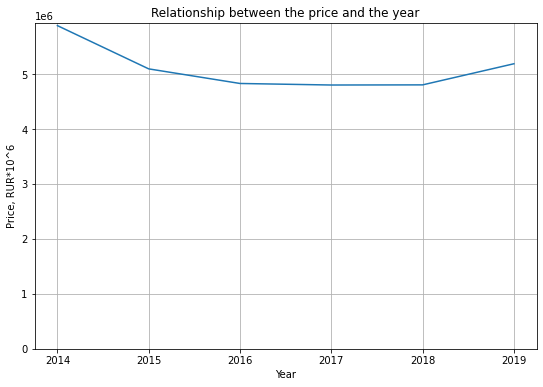

In [94]:
fixed_df.groupby('year')['last_price'].mean().plot(x='year', y='last_price', grid=True, figsize=(9,6),ylim=0, title='Relationship between the price and the year')
plt.xlabel('Year')
plt.ylabel('Price, RUR*10^6')
plt.show()

It can be seen that the average price is higher on Monday and higher in April and December. However, it is hardly possible that there is a relationship between the day of the week or month and the price. Probably, the price is affected by other unknown factors. Annual prices show a significant decrease until 2016. Then they remained steady until  2019 when there was a slight increase in real estate prices.

#### Question 2. Choose the top 10 localities by the number of ads. Calculate the average price per square meter in those settlements. Return the towns with the highest and lowest prices.

The top 10 towns by the number of advertisements and the average price per square meter in those towns.

In [95]:
top10_localities = fixed_df.groupby('locality_name')['locality_name'].count().sort_values(ascending = False).head(10)
top10_localities

locality_name
Санкт-Петербург      8289
Всеволожск            265
посёлок Шушары        214
Пушкин                204
Колпино               199
посёлок Мурино        198
Гатчина               144
Петергоф              137
посёлок Парголово     137
деревня Кудрово       122
Name: locality_name, dtype: int64

In [96]:
top10_localities_prices = fixed_df.query('locality_name in @top10_localities.index').groupby('locality_name')['price_per_square_metre'].mean().sort_values(ascending=False)
top10_localities_prices

locality_name
Санкт-Петербург      106014.834022
Пушкин               100385.498674
посёлок Парголово     90901.351145
деревня Кудрово       90778.013635
посёлок Мурино        87369.004392
Петергоф              83620.625679
посёлок Шушары        79584.221634
Колпино               75785.802596
Гатчина               69670.200978
Всеволожск            67270.541023
Name: price_per_square_metre, dtype: float64

The cities with the maximum and minimum average prices

In [97]:
top10_localities_prices.idxmax()

'Санкт-Петербург'

In [98]:
top10_localities_prices.idxmin()

'Всеволожск'

Among the top 10 settlements the greatest number of ads is in St.Petersburg; the highest price per sq. meter in St.Petersburg (106K RUR), the lowest  - in Vsevolojsk (67K RUR).

#### Question 3. The distance to the centre. Determine the city centre area for St. Petersburg.

The distance to the city centre in km

In [99]:
fixed_df['km_to_centre'] = (fixed_df['cityCenters_nearest']/1000).round()

The average price for each kilometer

In [100]:
fixed_df['avg_price_per_km'] = fixed_df['last_price'] / fixed_df['km_to_centre']

The average price by distance to the city centre

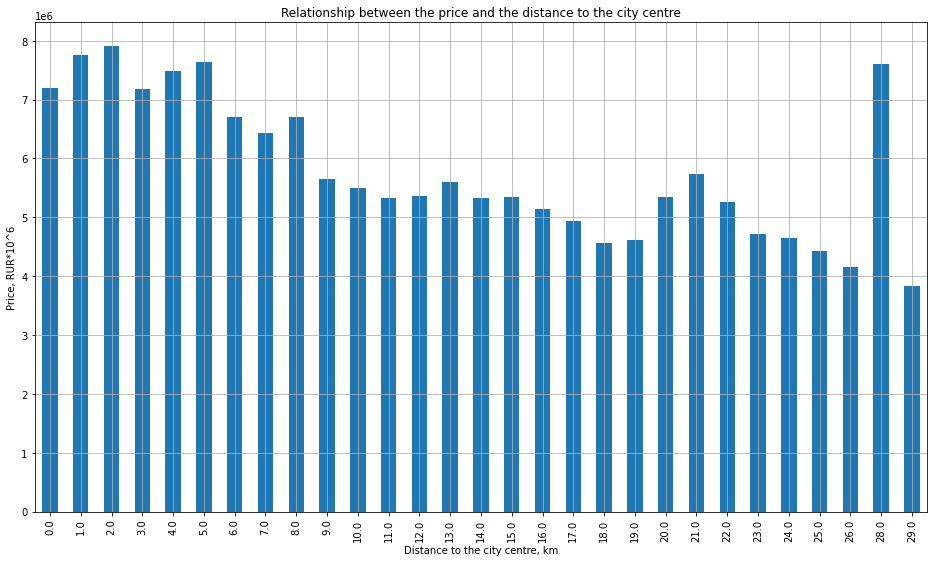

In [101]:
fixed_df[fixed_df['locality_name']=='Санкт-Петербург'].groupby('km_to_centre')['last_price'].mean().plot(kind='bar', x='km_to_centre', y='avg_price_per_km', grid=True, figsize=(16,9), title='Relationship between the price and the distance to the city centre')
plt.xlabel('Distance to the city centre, km')
plt.ylabel('Price, RUR*10^6')
plt.show()

Let's define the city centre as the area within 8 km, as after that point the price drops significantly.

#### Question 4. Segmentation for the city centre (by area, price, number of rooms, ceiling height). Features that affect the price (number of rooms, floor, distance from the city centre, date of publication). The difference between the city centre subset and the whole dataset.

Let's create a separate data frame for the city centre flats.

In [102]:
fixed_df_centre = fixed_df[(fixed_df['locality_name']=='Санкт-Петербург')&(fixed_df['km_to_centre']<9)]

Features: area, number of rooms, ceiling height and price

In [103]:
fixed_df_centre[['total_area', 'last_price', 'rooms','ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,1387.000000,1.387000e+03,1387.000000,1387.000000
mean,62.168428,7.112219e+06,2.222783,2.859769
std,20.214811,2.119534e+06,0.943635,0.219517
min,12.000000,1.600000e+06,0.000000,2.400000
25%,46.000000,5.550000e+06,2.000000,2.700000
50%,60.000000,6.900000e+06,2.000000,2.880000
75%,75.600000,8.600000e+06,3.000000,3.000000
max,114.000000,1.189440e+07,6.000000,3.210000


Let's compare with the original dataset

In [104]:
fixed_df[['total_area', 'last_price', 'rooms','ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,12541.000000,1.254100e+04,12541.000000,12541.000000
mean,52.822358,4.877556e+06,1.947373,2.659274
std,17.423182,2.138595e+06,0.887772,0.170006
min,12.000000,4.500000e+05,0.000000,2.200000
25%,39.400000,3.400000e+06,1.000000,2.500000
50%,49.900000,4.500000e+06,2.000000,2.600000
75%,63.100000,5.990000e+06,3.000000,2.750000
max,114.500000,1.189440e+07,6.000000,3.210000


Total_area in the city centre is larger (62 vs 53 metres), last_price is higher (7.1M RUR vs 4.9M RUR), the average number of rooms is greater (2.2 vs 1.9) and the ceiling height is higher (2.9 vs 2.7 metres).

Features that affect the price (the number of rooms, floor, distance to the city center, date of publication). Let's start with correlation.

In [105]:
fixed_df_centre[['last_price', 'total_area', 'rooms','cityCenters_nearest','ceiling_height']].corr()

,last_price,total_area,rooms,cityCenters_nearest,ceiling_height
last_price,1.000000,0.698949,0.471343,-0.178675,0.286065
total_area,0.698949,1.000000,0.815086,-0.215574,0.328146
rooms,0.471343,0.815086,1.000000,-0.217041,0.231700
cityCenters_nearest,-0.178675,-0.215574,-0.217041,1.000000,-0.279740
ceiling_height,0.286065,0.328146,0.231700,-0.279740,1.000000


In [106]:
fixed_df[['last_price', 'total_area', 'rooms','cityCenters_nearest','ceiling_height']].corr()

,last_price,total_area,rooms,cityCenters_nearest,ceiling_height
last_price,1.000000,0.689256,0.427539,-0.318447,0.433957
total_area,0.689256,1.000000,0.804765,-0.097715,0.300585
rooms,0.427539,0.804765,1.000000,-0.051545,0.042359
cityCenters_nearest,-0.318447,-0.097715,-0.051545,1.000000,-0.254328
ceiling_height,0.433957,0.300585,0.042359,-0.254328,1.000000


The relationship between the parameters and the price in the city centre is similar to the entire dataset: only the area correlates with the price. As for the distance to the city centre and ceiling height, the correlation in the city centre subset is even weaker than in the entire dataset.

<b>Area</b>

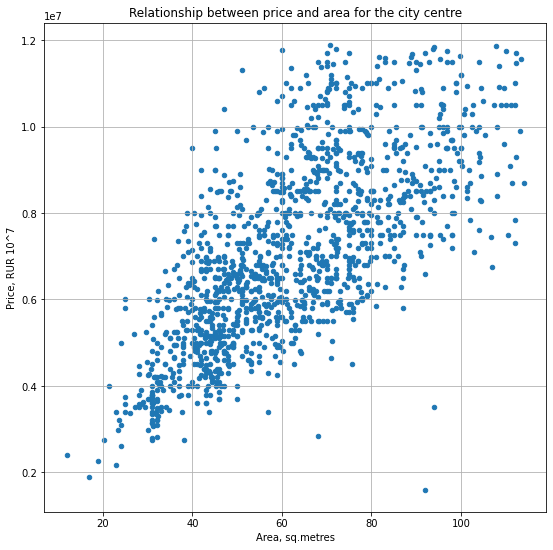

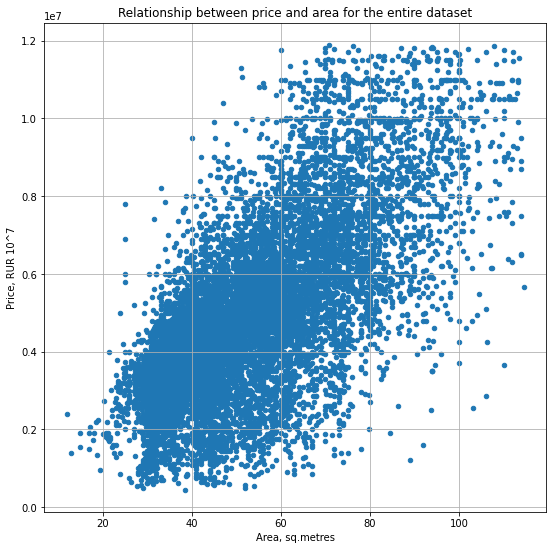

In [107]:
fixed_df_centre.plot(kind='scatter', x='total_area', y='last_price', grid=True, figsize=(9,9), title='Relationship between price and area for the city centre')
plt.xlabel('Area, sq.metres')
plt.ylabel('Price, RUR 10^7')
fixed_df.plot(kind='scatter', x='total_area', y='last_price', grid=True, figsize=(9,9), title='Relationship between price and area for the entire dataset')
plt.xlabel('Area, sq.metres')
plt.ylabel('Price, RUR 10^7')
plt.show()

There is a correlation (see the table above). The larger the area, the higher the price.

<b>Number of rooms</b>

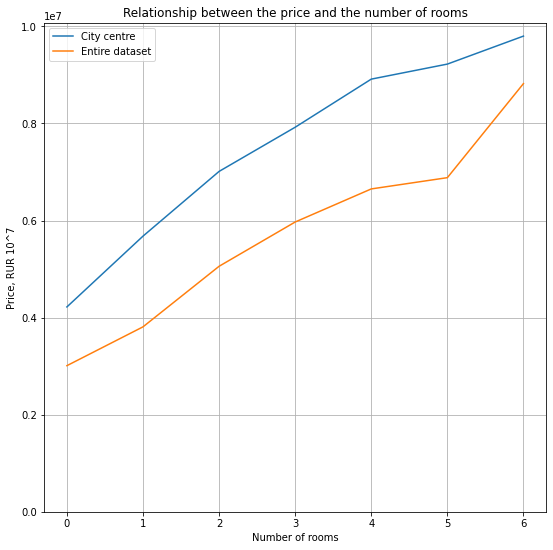

In [108]:
fixed_df_centre.groupby('rooms')['last_price'].mean().plot(x='rooms', y='last_price', grid=True, figsize=(9,9), ylim=0 ,label='City centre',legend=True, title='Relationship between the price and the number of rooms')
fixed_df.groupby('rooms')['last_price'].mean().plot(x='rooms', y='last_price', grid=True, figsize=(9,9), ylim=0 ,label='Entire dataset',legend=True)
plt.xlabel('Number of rooms')
plt.ylabel('Price, RUR 10^7')
plt.show()

The city centre shows the same trend as in the whole dataset: the greater number of rooms, the higher the price.

<b>Distance to the city centre</b>

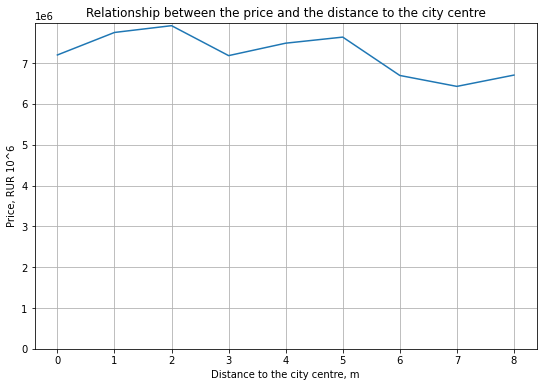

In [109]:
fixed_df_centre.groupby('km_to_centre')['last_price'].mean().plot(x='km_to_centre', y='last_price', grid=True, figsize=(9,6),ylim=0, title='Relationship between the price and the distance to the city centre')
plt.xlabel('Distance to the city centre, m')
plt.ylabel('Price, RUR 10^6')
plt.show()

The same trend as for the entire dataset, the larger distance, the lower the price. However, there are some fluctuations and the decrease is quite gradual.

<b>Floor</b>

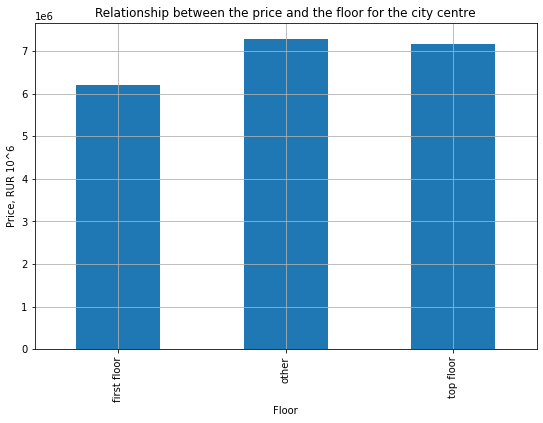

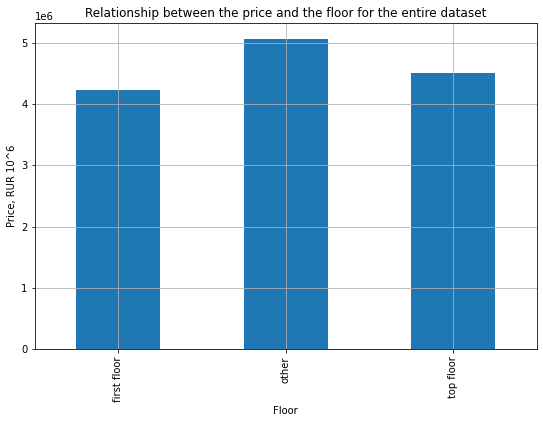

In [110]:
fixed_df_centre.groupby('floor_cat')['last_price'].mean().plot(kind='bar', x='floor_cat', y='last_price', grid=True, figsize=(9,6),ylim=0, title='Relationship between the price and the floor for the city centrе')
plt.xlabel('Floor')
plt.ylabel('Price, RUR 10^6')
plt.show()
fixed_df.groupby('floor_cat')['last_price'].mean().plot(kind='bar', x='floor_cat', y='last_price', grid=True, figsize=(9,6),ylim=0, title='Relationship between the price and the floor for the entire dataset')
plt.xlabel('Floor')
plt.ylabel('Price, RUR 10^6')
plt.show()

The distribution is similar: the first floor is the cheapest, while floors other than the first or top are the most expensive.

<b>Date of publication</b>

Correlation

In [111]:
fixed_df_centre[['last_price', 'weekday', 'month','year']].corr()

,last_price,weekday,month,year
last_price,1.000000,-0.023352,0.007826,-0.026136
weekday,-0.023352,1.000000,0.042592,0.036716
month,0.007826,0.042592,1.000000,-0.268705
year,-0.026136,0.036716,-0.268705,1.000000


In [112]:
fixed_df[['last_price', 'weekday', 'month','year']].corr()

,last_price,weekday,month,year
last_price,1.000000,-0.021160,0.000239,0.019290
weekday,-0.021160,1.000000,-0.008831,0.000204
month,0.000239,-0.008831,1.000000,-0.302104
year,0.019290,0.000204,-0.302104,1.000000


There isn't any correlation. Let's look at the average prices by day, month and year.

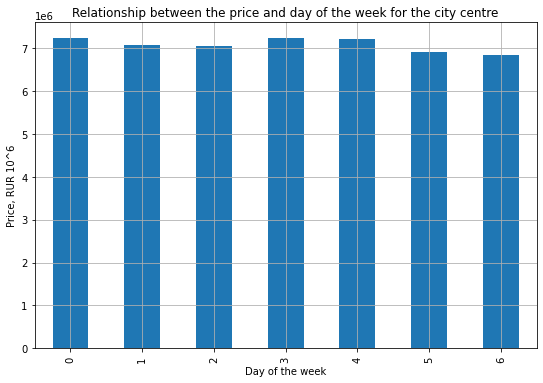

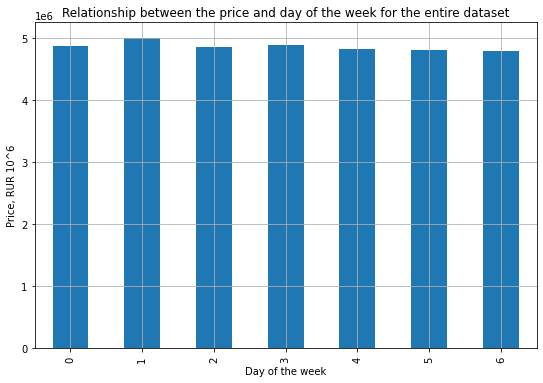

In [113]:
fixed_df_centre.groupby('weekday')['last_price'].mean().plot(kind='bar', x='weekday', y='last_price', grid=True, figsize=(9,6), title='Relationship between the price and day of the week for the city centre')
plt.xlabel('Day of the week')
plt.ylabel('Price, RUR 10^6')
plt.show()
fixed_df.groupby('weekday')['last_price'].mean().plot(kind='bar', x='weekday', y='last_price', grid=True, figsize=(9,6), title='Relationship between the price and day of the week for the entire dataset')
plt.xlabel('Day of the week')
plt.ylabel('Price, RUR 10^6')
plt.show()

The price is higher for ads that were posted on Wednesday, Thursday and Sunday, while in the entire dataset - on Monday.

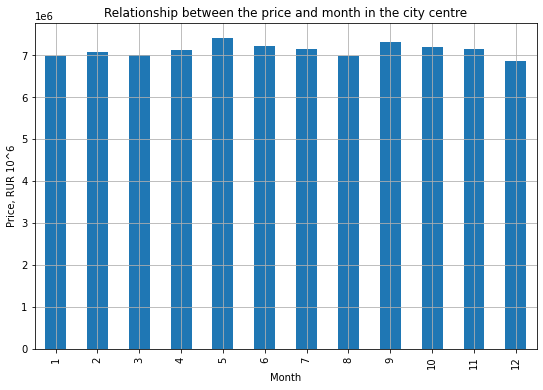

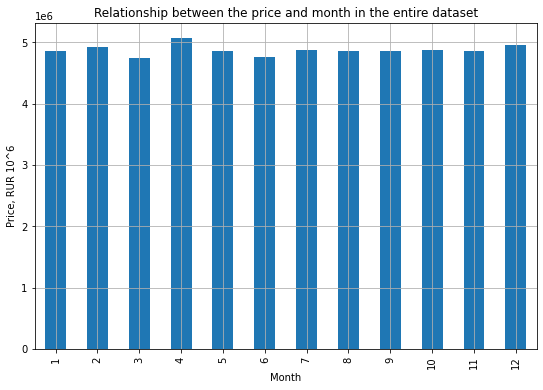

In [114]:
fixed_df_centre.groupby('month')['last_price'].mean().plot(kind='bar', x='month', y='last_price', grid=True, figsize=(9,6), title='Relationship between the price and month in the city centre')
plt.xlabel('Month')
plt.ylabel('Price, RUR 10^6')
plt.show()
fixed_df.groupby('month')['last_price'].mean().plot(kind='bar', x='month', y='last_price', grid=True, figsize=(9,6), title='Relationship between the price and month in the entire dataset')
plt.xlabel('Month')
plt.ylabel('Price, RUR 10^6')
plt.show()

The price is higher in May, while in the whole dataset - in April.

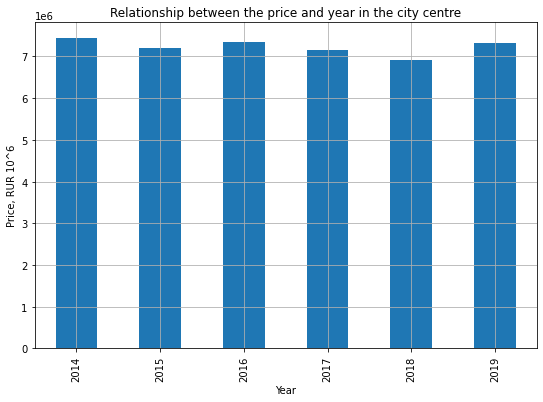

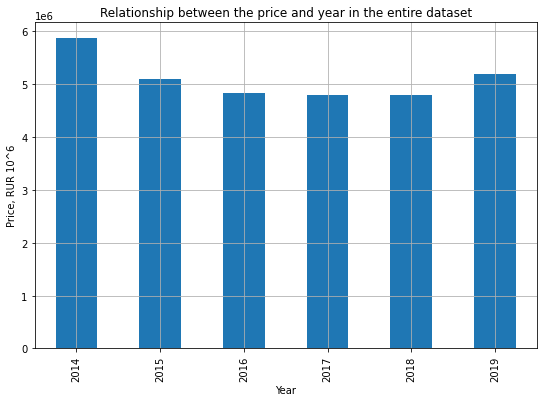

In [115]:
fixed_df_centre.groupby('year')['last_price'].mean().plot(kind='bar', x='year', y='last_price', grid=True, figsize=(9,6),ylim=0, title='Relationship between the price and year in the city centre')
plt.xlabel('Year')
plt.ylabel('Price, RUR 10^6')
plt.show()
fixed_df.groupby('year')['last_price'].mean().plot(kind='bar', x='year', y='last_price', grid=True, figsize=(9,6),ylim=0, title='Relationship between the price and year in the entire dataset')
plt.xlabel('Year')
plt.ylabel('Price, RUR 10^6')
plt.show()

There was a less significant decrease in prices after 2014 in the city centre. There was also a slight growth in 2016 and 2019, whereas, in the entire dataset, there was a significant drop in 2014, after which the prices were at the low level until 2019.

The city centre subset. There was a difference in pricing over years, in the city center the decrease wasn't so deep as in the entire dataset after 2014. Other parameters, such as area, distance to the city center, and floor, affect prices similarly as in the entire dataset.

### Stage 5. Conclusion

The analysis performed on Yandex Real Estate Service data (an archive of advertisements for the sales of apartments in St. Petersburg and neighbouring settlements) shows that the following parameters could be used to predict the market value of real estate objects:
- total_area
- rooms - the number of rooms;
- locality_name
- cityCenters_nearest - distance to the city centre (only for St. Petersburg);
- floor and floors_total. - the floor and the number of storeys in the building.


The influence of the parameters on the price:
- total_area, rooms - the higher the value of the parameter, the higher the price;
- cityCenters_nearest - the greater the distance, the lower the price;
- locality_name - real estate prices in St. Petersburg are higher than in other settlements.
- floor and floors_total - price in ascending order: first floor, last floor, other floors.